In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 7.0)

import collections
import nltk
from collections import defaultdict
from nltk import bigrams
from nltk import trigrams
import pandas as pd
from Bio import SeqIO
from sklearn.preprocessing import normalize
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


Using TensorFlow backend.


In [3]:
import sys
nb_stdout = sys.stdout
sys.stdout = open('/dev/stdout', 'w')
print 'hello'

In [2]:
"""
Length distribution of class 1 bacteriocins
"""

sizes = [len(rec) for rec in SeqIO.parse("class_1_protein.fa", "fasta")]
print len(sizes), min(sizes), max(sizes)

counter_class_1 = collections.Counter(sizes)
#print counter

keylist = counter_class_1.keys()
keylist.sort()
for key in keylist:
    print "%s: %s" % (key, counter_class_1[key]),

160 14 105
14: 1 18: 1 19: 4 20: 1 21: 4 22: 2 24: 1 30: 1 38: 2 40: 2 41: 1 42: 1 43: 2 44: 1 46: 4 47: 7 48: 10 49: 4 50: 2 51: 8 52: 4 53: 3 55: 5 56: 8 57: 9 58: 4 59: 3 60: 2 61: 3 62: 3 63: 6 64: 6 65: 2 66: 2 67: 4 68: 6 69: 2 70: 1 71: 5 72: 3 73: 1 74: 2 75: 1 76: 1 77: 1 78: 1 80: 1 81: 1 83: 1 86: 1 88: 1 91: 2 92: 1 95: 1 99: 1 102: 1 103: 1 105: 1


In [3]:
"""
Length distribution of class 2 bacteriocins
"""

sizes = [len(rec) for rec in SeqIO.parse("class_2_protein.fa", "fasta")]
print len(sizes), min(sizes), max(sizes)

counter_class_2 = collections.Counter(sizes)
#print counter

keylist = counter_class_2.keys()
keylist.sort()
for key in keylist:
    print "%s: %s" % (key, counter_class_2[key]),

229 7 255
7: 1 9: 2 10: 1 12: 4 13: 1 15: 1 18: 1 19: 1 20: 2 21: 1 22: 1 23: 1 24: 3 25: 2 26: 2 28: 1 29: 1 30: 2 31: 2 34: 1 35: 2 36: 2 37: 2 38: 2 39: 3 40: 1 41: 3 42: 2 43: 8 44: 10 45: 3 46: 2 47: 3 48: 1 49: 1 50: 4 51: 3 52: 2 53: 4 54: 2 55: 7 56: 4 57: 4 58: 4 59: 4 60: 3 61: 9 62: 9 63: 2 64: 5 65: 5 66: 3 67: 7 68: 2 69: 7 70: 2 71: 5 72: 3 74: 5 75: 4 76: 7 77: 2 78: 1 79: 1 80: 1 81: 2 84: 4 85: 2 87: 1 89: 2 90: 3 91: 2 96: 2 97: 2 101: 1 102: 2 103: 1 110: 1 120: 2 128: 1 131: 1 207: 1 225: 1 255: 1


In [6]:
print len(merged_class)
6 in merged_class
count = 0
for key in merged_class:
    count += merged_class[key]
    
print count
print keylist

93
389
[7, 9, 10, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 95, 96, 97, 99, 101, 102, 103, 105, 110, 120, 128, 131, 207, 225, 255]


In [36]:
extra_in_original_neg = list(set(keylist) - set(re_keylist))
print extra_in_original_neg

[36, 7, 9, 10, 12, 13, 14, 15, 18, 19, 20, 21, 22, 24, 25, 26]


In [37]:
out_handle = open('temp_negative_bacteriocin_set', 'w')

for record in SeqIO.parse("negative_bacteriocin_set", "fasta"):
    if len(record.seq) in extra_in_original_neg:
        out_handle.write(">%s\n%s\n" % (record.description, record.seq))
        
out_handle.close()
print "Done"


Done


In [38]:
print re_keylist

[23, 28, 29, 30, 31, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 95, 96, 97, 99, 101, 102, 103, 105, 110, 120, 128, 131, 207, 225, 255]


In [35]:
"""
Length distribution of redundant cdhit negative bacteriocin dataset
"""

sizes = [len(rec) for rec in SeqIO.parse("redundant_negative_bacteriocin_set_cd_hit_0.4", "fasta")]
print len(sizes), min(sizes), max(sizes)

counter_redundant = collections.Counter(sizes)
#print counter

re_keylist = counter_redundant.keys()
re_keylist.sort()
for key in re_keylist:
    print "%s: %s" % (key, counter_redundant[key]),

2200 23 255
23: 1 28: 3 29: 3 30: 1 31: 2 34: 2 35: 3 37: 5 38: 3 39: 3 40: 3 41: 7 42: 6 43: 7 44: 4 45: 3 46: 12 47: 8 48: 7 49: 5 50: 8 51: 7 52: 7 53: 9 54: 9 55: 3 56: 6 57: 18 58: 9 59: 7 60: 10 61: 15 62: 16 63: 10 64: 11 65: 13 66: 14 67: 14 68: 17 69: 20 70: 16 71: 16 72: 22 73: 20 74: 25 75: 19 76: 21 77: 23 78: 32 79: 27 80: 15 81: 19 83: 18 84: 33 85: 25 86: 34 87: 29 88: 35 89: 30 90: 35 91: 35 92: 45 95: 46 96: 49 97: 44 99: 49 101: 49 102: 45 103: 52 105: 76 110: 77 120: 91 128: 72 131: 121 207: 192 225: 169 255: 183


In [42]:
from collections import defaultdict

out_handle = open('temp_negative_bacteriocin_set_1', 'w')
keys_done = defaultdict(int)
gene_len_makeup = [29, 37, 46, 50, 41, 42, 52, 53, 54, 57, 58, 60]
for record in SeqIO.parse("redundant_negative_bacteriocin_set_cd_hit_0.4", "fasta"):
    if len(record) in re_keylist:
        if len(record) in gene_len_makeup:
            out_handle.write(">%s\n%s\n" % (record.description, record.seq))
            keys_done[len(record)] = keys_done[len(record)] + 1 
            continue
        if keys_done[len(record)] < merged_class[len(record)]: 
            out_handle.write(">%s\n%s\n" % (record.description, record.seq))
            keys_done[len(record)] = keys_done[len(record)] + 1 
            
out_handle.close()
re_keylist_1 = keys_done.keys()
re_keylist_1.sort()
for key in re_keylist_1:
    print "%s: %s" % (key, keys_done[key]),   

23: 1 28: 1 29: 3 30: 1 31: 2 34: 1 35: 2 37: 5 38: 3 39: 3 40: 3 41: 7 42: 6 43: 7 44: 4 45: 3 46: 12 47: 8 48: 7 49: 5 50: 8 51: 7 52: 7 53: 9 54: 9 55: 3 56: 6 57: 18 58: 9 59: 7 60: 10 61: 12 62: 12 63: 8 64: 11 65: 7 66: 5 67: 11 68: 8 69: 9 70: 3 71: 10 72: 6 73: 1 74: 7 75: 5 76: 8 77: 3 78: 2 79: 1 80: 2 81: 3 83: 1 84: 4 85: 2 86: 1 87: 1 88: 1 89: 2 90: 3 91: 4 92: 1 95: 1 96: 2 97: 2 99: 1 101: 1 102: 3 103: 2 105: 1 110: 1 120: 2 128: 1 131: 1 207: 1 225: 1 255: 1


In [46]:
diffkeys = [k for k in counter_redundant_f if counter_redundant_f[k] != merged_class[k]]
for k in diffkeys:
    print k, ':', counter_redundant_f[k], '->', merged_class[k]

19 : 4 -> 5
24 : 3 -> 4
29 : 3 -> 1
30 : 1 -> 3
37 : 3 -> 2
38 : 3 -> 4
41 : 7 -> 4
42 : 6 -> 3
43 : 7 -> 10
44 : 4 -> 11
46 : 12 -> 6
47 : 8 -> 10
48 : 7 -> 11
50 : 8 -> 6
51 : 7 -> 11
52 : 7 -> 6
53 : 9 -> 7
54 : 9 -> 2
55 : 3 -> 12
56 : 6 -> 12
57 : 18 -> 13
58 : 9 -> 8
60 : 10 -> 5


In [4]:
# Adding all the key values for which, keys are common in both classes
merged_class = {}
keylist = counter_class_2.keys()
keylist.sort()
for key in keylist:
    merged_class[key] = counter_class_2[key] + counter_class_1[key]

# Adding keys that were only in class 1
for key in counter_class_1:
    if key not in merged_class:
        merged_class[key] = counter_class_1[key]

# Now we have all keys from class 1 and class 2
keylist = merged_class.keys()
keylist.sort()
for key in keylist:
    print "%s: %s" % (key, merged_class[key]),


7: 1 9: 2 10: 1 12: 4 13: 1 14: 1 15: 1 18: 2 19: 5 20: 3 21: 5 22: 3 23: 1 24: 4 25: 2 26: 2 28: 1 29: 1 30: 3 31: 2 34: 1 35: 2 36: 2 37: 2 38: 4 39: 3 40: 3 41: 4 42: 3 43: 10 44: 11 45: 3 46: 6 47: 10 48: 11 49: 5 50: 6 51: 11 52: 6 53: 7 54: 2 55: 12 56: 12 57: 13 58: 8 59: 7 60: 5 61: 12 62: 12 63: 8 64: 11 65: 7 66: 5 67: 11 68: 8 69: 9 70: 3 71: 10 72: 6 73: 1 74: 7 75: 5 76: 8 77: 3 78: 2 79: 1 80: 2 81: 3 83: 1 84: 4 85: 2 86: 1 87: 1 88: 1 89: 2 90: 3 91: 4 92: 1 95: 1 96: 2 97: 2 99: 1 101: 1 102: 3 103: 2 105: 1 110: 1 120: 2 128: 1 131: 1 207: 1 225: 1 255: 1


In [44]:
"""
Length distribution of redundant cdhit negative bacteriocin dataset
"""

sizes = [len(rec) for rec in SeqIO.parse("final_negative_bacteriocin_set_cd-hit_0.7.fa", "fasta")]
print len(sizes), min(sizes), max(sizes)

counter_redundant_f = collections.Counter(sizes)
#print counter

re_keylist_f = counter_redundant_f.keys()
re_keylist_f.sort()
for key in re_keylist_f:
    print "%s: %s" % (key, counter_redundant_f[key]),

383 12 255
12: 4 13: 1 14: 1 15: 1 18: 2 19: 4 20: 3 21: 5 22: 3 23: 1 24: 3 25: 2 26: 2 28: 1 29: 3 30: 1 31: 2 34: 1 35: 2 36: 2 37: 3 38: 3 39: 3 40: 3 41: 7 42: 6 43: 7 44: 4 45: 3 46: 12 47: 8 48: 7 49: 5 50: 8 51: 7 52: 7 53: 9 54: 9 55: 3 56: 6 57: 18 58: 9 59: 7 60: 10 61: 12 62: 12 63: 8 64: 11 65: 7 66: 5 67: 11 68: 8 69: 9 70: 3 71: 10 72: 6 73: 1 74: 7 75: 5 76: 8 77: 3 78: 2 79: 1 80: 2 81: 3 83: 1 84: 4 85: 2 86: 1 87: 1 88: 1 89: 2 90: 3 91: 4 92: 1 95: 1 96: 2 97: 2 99: 1 101: 1 102: 3 103: 2 105: 1 110: 1 120: 2 128: 1 131: 1 207: 1 225: 1 255: 1


In [23]:
keys_done = defaultdict(int)
keys_done[23]
print merged_class[23]

1


In [307]:
"""
Making a redundant negative bacteriocin dataset from swissprot reviewed bacteria 
portion

Just take all sequences that have a length which is also a bacteriocin length
"""

out_handle = open('redundant_negative_bacteriocin_set', 'w')
for record in SeqIO.parse("uniprot_sprot_bacteria.dat", "swiss"):
    if 'keywords' in record.annotations and 'comment' in record.annotations: 
        if 'Bacteriocin' not in record.annotations['keywords'] and \
            'Plasmid' not in record.annotations['keywords'] and \
            'Antimicrobial' not in record.annotations['keywords'] and \
            'Antibiotic' not in record.annotations['keywords'] and \
            len(record.annotations['comment']) >= 125 and \
            len(record.seq) in keylist:
                out_handle.write('>%s|%s|%s|%s\n%s\n' % (record.name, record.id, record.description, 
                                                     str(len(record.seq)),
                                                     record.seq))

out_handle.close()
print "Done"

Done


In [116]:
"""
Getting negative sequnces of the same length as the postitive training examples
for bacteriocin detection i.e. BAGEL sequences
"""

from Bio import SeqIO
from collections import defaultdict
flag = 0
count = 0

keys_track = defaultdict(int)
keys_done = []
keys_description_done = []
out_handle = open('negative_bacteriocin_set', 'w')
for record in SeqIO.parse("uniprot_sprot_bacteria.dat", "swiss"):
    if 'keywords' in record.annotations and 'comment' in record.annotations: 
        if 'Bacteriocin' not in record.annotations['keywords'] and \
            'Plasmid' not in record.annotations['keywords'] and \
            'Antimicrobial' not in record.annotations['keywords'] and \
            'Antibiotic' not in record.annotations['keywords'] and \
            len(record.annotations['comment']) >= 125 and \
            len(record.seq) in merged_class and \
            len(record.seq) not in keys_done and \
            str(record.description) not in keys_description_done:
                if keys_track[len(record.seq)] + 1 < merged_class[len(record.seq)]:
                    keys_track[len(record.seq)] = keys_track[len(record.seq)] + 1
                    flag = 1
                elif keys_track[len(record.seq)] + 1 == merged_class[len(record.seq)]:
                    keys_track[len(record.seq)] = keys_track[len(record.seq)] + 1
                    keys_done.append(len(record.seq))
                    flag = 1
        if flag == 1:
            print record.annotations['comment']
            print record.annotations['keywords']
            print record.seq
            print len(record.seq)
            print keys_track[len(record.seq)]
            print
            # NO 2 sequences should have the same description
            keys_description_done.append(str(record.description))
            
            out_handle.write('>%s|%s|%s|%s\n%s\n' % (record.name, record.id, record.description, 
                                                     str(len(record.seq)),
                                                     record.seq))
        flag = 0
    if keys_track == merged_class:
        print "Breaking - got the sequences"
        break
        #break

out_handle.close()
keylist = keys_track.keys()
keylist.sort()
for key in keylist:
    print "%s: %s" % (key, keys_track[key]),

FUNCTION: Catalyzes the oxidation of the 12-alpha-hydroxyl group of bile acids, both in their free and conjugated form. Also acts on bile alcohols.
CATALYTIC ACTIVITY: 3-alpha,7-alpha,12-alpha-trihydroxy-5-beta- cholanate + NADP(+) = 3-alpha,7-alpha-dihydroxy-12-oxo-5-beta- cholanate + NADPH.
SUBUNIT: Homotetramer.
MISCELLANEOUS: The thermostability of the enzyme is greatly increased due to NADP binding.
['Bile acid catabolism', 'Direct protein sequencing', 'Lipid degradation', 'Lipid metabolism', 'NADP', 'Oxidoreductase', 'Steroid metabolism']
MIFDGKVAIITGGGKAKSIGYGIAVAYAK
29
1

SUBCELLULAR LOCATION: Cell outer membrane {ECO:0000305}; Lipid- anchor {ECO:0000305}.
SIMILARITY: Belongs to the rickettsiale 17 kDa surface antigen family. {ECO:0000305}.
['Cell outer membrane', 'Lipoprotein', 'Membrane']
GSQFGKGKGQLIGVGAGALLGAILGNQIGAGMDEQDRRLAELTSQRALETTPSGTSIEWRNPDNGNYGYVTPSKTYKNST
80
1

INDUCTION: Under acid-stress, this protein is expressed at a higher level in wild-type B.cereus than in

In [301]:
with open('negative_bacteriocin_set', 'r') as in_handle:
    for index, record in enumerate(SeqIO.parse(in_handle, 'fasta')):
        if len(record.seq) == 81:
            print ">%s\n%s" % (record.description, record.seq)

>ACP_ACAM1|B0CE03|RecName: Full=Acyl carrier protein {ECO:0000255|HAMAP-Rule:MF_01217}; Short=ACP {ECO:0000255|HAMAP-Rule:MF_01217};|81
MSESEIFGKVKDIVAEQLSVDADKVTPEASFQNDLDADSLDVVEMVMALEEEFDIEIPDEAAEEILTVQAAVDFIAGKVKA
>ATPL_ACIAD|Q6FFK5|RecName: Full=ATP synthase subunit c {ECO:0000255|HAMAP-Rule:MF_01396}; AltName: Full=ATP synthase F(0) sector subunit c {ECO:0000255|HAMAP-Rule:MF_01396}; AltName: Full=F-type ATPase subunit c {ECO:0000255|HAMAP-Rule:MF_01396}; Short=F-ATPase subunit c {ECO:0000255|HAMAP-Rule:MF_01396}; AltName: Full=Lipid-binding protein {ECO:0000255|HAMAP-Rule:MF_01396};|81
MELTLGLVAIASAILIAFGALGTAIGFGLLGGRFLEAVARQPELAPQLQTRMFLIAGLLDAVPMIGVGIGLFFIFANPFVG
>CSMA_PROA2|P15528|RecName: Full=Bacteriochlorophyll c-binding protein; Short=BChl c-binding; AltName: Full=Chlorosome protein A; Flags: Precursor;|81
MSGGGVFTDILAAAGRIFEVMVEGHWETVGMLFDSLGKGTMRINRNAYGNLGGGGGSLRGSSPEVSGFAVPTKAVESKFAK


In [300]:
# done upto 80
with open('swissprot_bacteria_seqs.fa', 'r') as in_handle:
    for index, record in enumerate(SeqIO.parse(in_handle, 'fasta')):
        if len(record.seq) == 81:
            print ">%s\n%s" % (record.description, record.seq)

>ACP2_RALSO|Q8XSU8|RecName: Full=Acyl carrier protein 2 {ECO:0000255|HAMAP-Rule:MF_01217}; Short=ACP 2 {ECO:0000255|HAMAP-Rule:MF_01217};|81
MTETEILERIRSIFQENFAIDPARVTPEAHLFEELDLDSIDAVDLAIKLQEMTGRRIKPEEFKSVRTVGDVIGAVQSLLAA
>ACP_ACAM1|B0CE03|RecName: Full=Acyl carrier protein {ECO:0000255|HAMAP-Rule:MF_01217}; Short=ACP {ECO:0000255|HAMAP-Rule:MF_01217};|81
MSESEIFGKVKDIVAEQLSVDADKVTPEASFQNDLDADSLDVVEMVMALEEEFDIEIPDEAAEEILTVQAAVDFIAGKVKA
>ACP_ARTS2|A0JXS7|RecName: Full=Acyl carrier protein {ECO:0000255|HAMAP-Rule:MF_01217}; Short=ACP {ECO:0000255|HAMAP-Rule:MF_01217};|81
MASNEEILAGLAEIVNEETGLATEAVELDKSFTEDLDIDSISMMTIVVNAEEKFGVRIPDEEVKNLKTVGDAVSFIANAQA
>ACP_CHLTE|Q8KAN9|RecName: Full=Acyl carrier protein {ECO:0000255|HAMAP-Rule:MF_01217}; Short=ACP {ECO:0000255|HAMAP-Rule:MF_01217};|81
MSAAEIKDKVYDIIVSKMGVNKDQIKPESKFADDLGADSLDTVELIMELENEFGVQIPDEDAEKIGTVQQAIDYIVNKKVS
>ACP_CYAA5|B1WRM4|RecName: Full=Acyl carrier protein {ECO:0000255|HAMAP-Rule:MF_01217}; Short=ACP {ECO:0000255|HAMAP-Rule:M

In [296]:
for record in SeqIO.parse("uniprot_sprot_bacteria.dat", "swiss"):
    if 'keywords' in record.annotations and 'comment' in record.annotations: 
        if 'Bacteriocin' not in record.annotations['keywords'] and \
            'Plasmid' not in record.annotations['keywords'] and \
            'Antimicrobial' not in record.annotations['keywords'] and \
            'Antibiotic' not in record.annotations['keywords'] and \
            len(record.seq) == 79:
                print record.annotations['comment']
                print record.annotations['keywords']
                print record.description
                print record.seq
                print

FUNCTION: Carrier of the growing fatty acid chain in fatty acid biosynthesis. {ECO:0000255|HAMAP-Rule:MF_01217}.
PATHWAY: Lipid metabolism; fatty acid biosynthesis. {ECO:0000255|HAMAP-Rule:MF_01217}.
SUBCELLULAR LOCATION: Cytoplasm {ECO:0000255|HAMAP-Rule:MF_01217}.
PTM: 4'-phosphopantetheine is transferred from CoA to a specific serine of apo-ACP by AcpS. This modification is essential for activity because fatty acids are bound in thioester linkage to the sulfhydryl of the prosthetic group. {ECO:0000255|HAMAP- Rule:MF_01217}.
SIMILARITY: Belongs to the acyl carrier protein (ACP) family. {ECO:0000255|HAMAP-Rule:MF_01217}.
['Complete proteome', 'Cytoplasm', 'Fatty acid biosynthesis', 'Fatty acid metabolism', 'Lipid biosynthesis', 'Lipid metabolism', 'Phosphopantetheine', 'Phosphoprotein', 'Reference proteome']
RecName: Full=Acyl carrier protein 1 {ECO:0000255|HAMAP-Rule:MF_01217}; Short=ACP 1 {ECO:0000255|HAMAP-Rule:MF_01217};
MDNIEQRVKKIVAEQLGVAEADIKNESSFVNDLGADSLDTVELVMALEDEFGMEIPDEEA

In [229]:
"RecName: Full=Sporulation killing factor {ECO:0000303|PubMed:20805502}; Short=SKF {ECO:0000303|PubMed:20805502}; AltName: Full=Sporulation-killing factor SkfA; Flags: Precursor;" in \
keys_description_done

False

In [96]:
if merged_class == keys_track:
    print 'yes'
    
shared_items = set(merged_class.items()) ^ set(keys_track.items())
print len(shared_items)
print shared_items

yes
0
set([])


In [72]:
for record in SeqIO.parse("uniprot_sprot_bacteria.dat", "swiss"):
    if 'keywords' in record.annotations and 'comment' in record.annotations: 
#         for kw in record.annotations['keywords']:
#             if 'bacteriocin' in kw:
#                 #print 'yes'
#                 flag = 1
#             elif 'Bacteriocin' in kw and 'plasmid' not in kw:
#                 flag = 1
#             #else:
            #    print "no"
#         if 'Bacteriocin' in record.annotations['keywords'] and 'Plasmid' not in record.annotations['keywords']:
#             count += 1
#             flag = 1
        if 'Bacteriocin' not in record.annotations['keywords'] and \
            'Plasmid' not in record.annotations['keywords'] and \
            len(record.seq) == 12:
                print record.annotations['comment']
                print record.annotations['keywords']
                print record.seq
                print

FUNCTION: Has bactericidal activity against E.coli ATCC 29522 and S.aureus. Inhibits growth of S.marcescens and B.cereus ATCC 14579. A synthetic peptide has antibacterial activity against E.coli ATCC 29522 (MIC=8 ug/ml), S.aureus (MIC=64 ug/ml), S.marcescens (MIC=32 ug/ml), B.cereus ATCC 14579 (MIC=64 ug/ml), B.subtilis (MIC=32 ug/ml), L.plantarum ATCC 8014 (MIC=32 ug/ml), B.flexus (MIC=32 ug/ml), S.enteritidis ATCC 13076 (MIC=4 ug/ml), Enterobacter spp (MIC=32 ug/ml), B.anthracis (MIC=128 ug/ml), B.licheniformis (MIC>128 ug/ml) and L.lactis ATCC 11454 (MIC>128 ug/ml). {ECO:0000269|PubMed:23508455}.
BIOPHYSICOCHEMICAL PROPERTIES: pH dependence:   Active between pH 2 and 12. {ECO:0000269|PubMed:23508455}; Temperature dependence:   Active between 37 and 90 degrees Celsius. Activity is reduced at   100 degrees Celsius and absent at 110 degrees Celsius. Activity   is unaffected by storage at -20 degrees Celsius.   {ECO:0000269|PubMed:23508455};
MASS SPECTROMETRY: Mass=1316.734; Method=Elec

In [100]:
for record in SeqIO.parse("uniprot_sprot_bacteria.dat", "swiss"):
    print record.q
    break

RecName: Full=12-alpha-hydroxysteroid dehydrogenase; EC=1.1.1.176; Flags: Fragment;


In [78]:
"""
Length distribution of all context genes
"""
from Bio import SeqIO
sizes = [len(rec) for rec in SeqIO.parse("all_curated_context_genes.fa", "fasta")]
print len(sizes), min(sizes), max(sizes)

counter_context = collections.Counter(sizes)
#print counter

keylist = counter_context.keys()
keylist.sort()
for key in keylist:
    print "%s: %s" % (key, counter_context[key]),
    

1240 11 1377
11: 1 13: 3 33: 1 36: 1 38: 1 39: 1 43: 1 47: 4 49: 1 50: 1 51: 2 52: 2 53: 4 55: 1 56: 3 57: 1 58: 2 59: 4 60: 3 62: 4 63: 1 64: 3 65: 4 66: 5 67: 1 68: 4 69: 8 70: 3 71: 3 73: 3 74: 3 75: 1 77: 1 78: 2 79: 1 80: 1 81: 1 83: 2 84: 2 85: 5 86: 3 88: 4 89: 1 90: 3 91: 3 92: 5 93: 1 95: 3 96: 1 97: 7 98: 7 99: 1 100: 3 101: 2 102: 2 103: 1 104: 2 105: 2 106: 3 107: 7 108: 1 109: 5 110: 2 111: 4 112: 7 113: 3 114: 1 115: 5 116: 1 117: 4 118: 3 120: 2 121: 5 122: 1 123: 1 124: 4 125: 2 126: 8 127: 2 128: 2 129: 4 131: 2 132: 2 133: 3 134: 1 135: 1 137: 1 138: 1 139: 1 140: 3 141: 5 144: 5 145: 3 146: 2 148: 2 149: 2 150: 5 152: 2 154: 3 155: 1 156: 2 158: 2 160: 3 161: 1 162: 1 163: 2 164: 1 166: 1 167: 1 168: 3 169: 2 171: 2 172: 1 174: 2 175: 2 176: 2 177: 3 178: 2 179: 1 180: 1 181: 2 183: 1 184: 1 185: 4 186: 3 187: 2 188: 3 190: 3 191: 7 192: 1 193: 2 194: 1 195: 1 196: 1 197: 1 198: 2 199: 1 200: 2 201: 4 202: 1 203: 1 204: 1 205: 2 206: 2 207: 2 208: 3 209: 5 210: 2 211

In [92]:
"""
Investigating the length of the context gene sequences to
decide which can be included in the negative bacteriocin set
"""
key_done = [0]
count = 0
seq_len_want = []
for key in counter_context:
    if key >= 255 and key not in key_done and key > (key_done[-1]+2):
        print key,
        seq_len_want.append(key)
        count += 1
        key_done.append(key)
print
print count
print seq_len_want

255 258 261 264 267 270 273 276 280 284 287 290 293 296 299 302 305 308 311 314 318 321 325 328 333 337 341 344 347 350 353 356 363 366 372 375 378 381 384 387 390 393 397 401 405 408 411 414 417 420 423 426 429 432 435 438 441 445 448 451 455 459 462 469 472 477 481 488 491 494 497 500 503 506 509 512 515 522 525 529 535 538 541 545 552 557 560 564 569 574 577 581 585 588 591 595 598 608 612 616 619 623 626 629 632 635 639 642 648 656 660 663 670 674 680 687 690 696 699 702 706 709 712 715 718 721 724 728 732 745 768 803 837 844 871 876 888 892 904 917 923 927 931 938 943 959 965 975 980 990 993 997 1030 1033 1036 1052 1059 1062 1219 1302 1377
161
[255, 258, 261, 264, 267, 270, 273, 276, 280, 284, 287, 290, 293, 296, 299, 302, 305, 308, 311, 314, 318, 321, 325, 328, 333, 337, 341, 344, 347, 350, 353, 356, 363, 366, 372, 375, 378, 381, 384, 387, 390, 393, 397, 401, 405, 408, 411, 414, 417, 420, 423, 426, 429, 432, 435, 438, 441, 445, 448, 451, 455, 459, 462, 469, 472, 477, 481, 488, 49

In [95]:
"""
Getting the sequences with lengths that were decided in the previous cell
"""
out_handle = open('filtered_curated_context_gene_for_new_negative_set', 'w')
seq_done = []
with open('all_curated_context_genes_proper.fa', 'r') as in_handle:
    for index, record in enumerate(SeqIO.parse(in_handle, 'fasta')):
        if len(record.seq) in seq_len_want and len(record.seq) not in seq_done:
            out_handle.write('>%s\n%s\n' % (record.description, record.seq))
            seq_done.append(len(record.seq))
            

print "Done"    

Done


In [3]:
"""
Writing down all trembl bacteria sequences in a fasta file
"""
out_handle = open('trembl_bacteria_seqs.fa', 'w')
for record in SeqIO.parse("uniprot_trembl_bacteria.dat", "swiss"):
    out_handle.write('>%s|%s|%s|%s\n%s\n' % (record.name, record.id, record.description, str(len(record.seq)),
                                             record.seq))

out_handle.close()

In [108]:
"""
Writing down all swissprot bacteria sequences in a fasta file
"""
out_handle = open('swissprot_bacteria_seqs.fa', 'w')
for record in SeqIO.parse("uniprot_sprot_bacteria.dat", "swiss"):
    out_handle.write('>%s|%s|%s|%s\n%s\n' % (record.name, record.id, record.description, str(len(record.seq)),
                                             record.seq))

out_handle.close()

<function close>

In [115]:
'RecName: Full=Protein AaeX;' not in keys_description_done

True

In [2]:
df = pd.read_csv('protVec_100d_3grams_new.csv', sep = '\t', header = None)

#df.values
#df.columns.values[0] = 'trigram_name'

df = df.set_index(0)
df.head(10)

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,,,,,,,,,,,,,,,,,,,,,
AAA,-0.174060,-0.095756,0.059515,0.039673,-0.375934,-0.115415,0.090725,0.173422,0.292520,0.190375,...,0.244482,0.015974,0.012903,0.137528,0.138140,0.005474,0.070719,-0.164084,-0.179274,0.184899
ALA,-0.114085,-0.093288,0.155800,-0.037351,-0.121446,0.084037,0.023819,0.093442,0.143256,0.044627,...,0.075584,-0.139661,0.034863,0.056078,0.028975,-0.012233,0.059669,0.037811,-0.172493,0.074655
LLL,-0.075594,-0.100834,-0.046616,-0.208980,-0.008596,-0.038612,-0.049360,0.060720,-0.062662,-0.155879,...,0.174677,-0.175961,-0.193242,-0.072965,-0.075560,0.158286,-0.026378,0.037155,-0.176038,0.319293
LAA,-0.137546,-0.135425,0.121566,-0.038295,-0.212129,0.040009,0.078545,0.029837,0.138343,0.049377,...,0.133947,-0.156484,-0.048541,0.141848,0.081842,0.070573,0.006927,0.035281,-0.138971,0.105997
AAL,-0.156112,-0.133524,0.114426,-0.020264,-0.058513,0.057005,0.076881,0.054781,0.129436,0.019448,...,0.154597,-0.050440,0.054866,0.066185,0.017498,0.001773,-0.083944,-0.003867,-0.106367,0.070706
ALL,-0.056191,-0.144594,0.043214,-0.146754,-0.058094,0.024076,0.074966,-0.028923,0.056939,0.104797,...,0.127284,-0.136185,0.018533,-0.021787,0.018663,-0.045316,-0.015182,0.043806,-0.066563,0.159971
LLA,-0.177890,-0.001898,0.032638,-0.053407,-0.036736,-0.021239,-0.013052,-0.026865,0.029256,0.061432,...,0.106187,-0.136744,-0.021721,-0.010791,0.001195,0.059006,-0.080312,0.075235,-0.109046,0.123678
LAL,-0.188611,-0.002185,0.108836,-0.126098,-0.001931,-0.017215,-0.056647,0.043682,0.039895,-0.084752,...,0.142023,-0.155075,-0.020684,0.017047,0.090200,-0.026145,0.027764,0.055355,-0.167330,0.201886
SSS,0.012405,-0.368833,-0.368951,-0.212781,-0.227907,-0.243726,0.056344,-0.137908,0.083584,-0.105236,...,0.315106,0.290427,0.173865,0.038017,0.129015,0.026049,0.117615,-0.661962,-0.036233,-0.178995


In [2]:
new_model = gensim.models.Word2Vec.load('my_wordvec_model_trembl')

2017-05-04 21:27:05,981 : INFO : loading Word2Vec object from my_wordvec_model_trembl
2017-05-04 21:27:06,039 : INFO : loading wv recursively from my_wordvec_model_trembl.wv.* with mmap=None
2017-05-04 21:27:06,040 : INFO : setting ignored attribute syn0norm to None
2017-05-04 21:27:06,041 : INFO : setting ignored attribute cum_table to None
2017-05-04 21:27:06,043 : INFO : loaded my_wordvec_model_trembl


In [4]:
import csv
out_handle = open('swissprot_seqs_word_vector_trembl.csv', 'wb')
csv_writer = csv.writer(out_handle, delimiter='\t')

for index, record in enumerate(SeqIO.parse('swissprot_bacteria_seqs.fa', 'fasta')):
    sum_of_sequence = 0
    tri_tokens = trigrams(record.seq)
    
    for index1, item in enumerate(tri_tokens):
        tri_str = item[0] + item[1] + item[2]
        if tri_str not in list(new_model.wv.vocab):
            continue
        #print tri_str
        #print 
        sum_of_sequence = sum_of_sequence + new_model[tri_str]
    #print sum_of_sequence
    csv_writer.writerow(sum_of_sequence)
    print index
    
out_handle.close()
print "Done"

In [10]:
count = 0
out_handle = open('final_negative_bacteriocin_set.fa_without_fragments', 'w')
for record in SeqIO.parse('final_negative_bacteriocin_set.fa', 'fasta'):
    if 'Fragment' in record.description:
        count = count + 1
    else:
        out_handle.write('>%s\n%s\n' % (record.description, record.seq))

out_handle.close()
print count

103


In [4]:
min_ = 10000000
max_ = -1 
for record in SeqIO.parse('less_than_30_pos_neg_bacteriocin.fa', 'fasta'):
    length = len(record.seq)
    #print length
    if int(length) < min_:
        min_ = int(length)
    if int(length) > max_:
        max_ = int(length)
    #break
print min_
print max_

31
255


In [15]:
count = 0
out_handle = open('all_bagel_bacteriocins_cd-hit_0.7.fa_more_than_length_21', 'w')
for record in SeqIO.parse('all_bagel_bacteriocins_cd-hit_0.7.fa', 'fasta'):
    if len(record.seq) < 21:
        count = count + 1
    else:
        out_handle.write('>%s\n%s\n' % (record.description, record.seq))

out_handle.close()
print count

10


## Making 4 more negative datasets

In [5]:
already_in_neg_dataset_ids = []
for record in SeqIO.parse("negative_bacteriocin_less_than_30.fa", "fasta"):
    id_ = record.description.split("|")[0]
    #print id_
    already_in_neg_dataset_ids.append(id_)
    
print len(already_in_neg_dataset_ids)

346


In [6]:
print merged_class

{7: 1, 9: 2, 10: 1, 12: 4, 13: 1, 14: 1, 15: 1, 18: 2, 19: 5, 20: 3, 21: 5, 22: 3, 23: 1, 24: 4, 25: 2, 26: 2, 28: 1, 29: 1, 30: 3, 31: 2, 34: 1, 35: 2, 36: 2, 37: 2, 38: 4, 39: 3, 40: 3, 41: 4, 42: 3, 43: 10, 44: 11, 45: 3, 46: 6, 47: 10, 48: 11, 49: 5, 50: 6, 51: 11, 52: 6, 53: 7, 54: 2, 55: 12, 56: 12, 57: 13, 58: 8, 59: 7, 60: 5, 61: 12, 62: 12, 63: 8, 64: 11, 65: 7, 66: 5, 67: 11, 68: 8, 69: 9, 70: 3, 71: 10, 72: 6, 73: 1, 74: 7, 75: 5, 76: 8, 77: 3, 78: 2, 79: 1, 80: 2, 81: 3, 83: 1, 84: 4, 85: 2, 86: 1, 87: 1, 88: 1, 89: 2, 90: 3, 91: 4, 92: 1, 95: 1, 96: 2, 97: 2, 99: 1, 101: 1, 102: 3, 103: 2, 105: 1, 110: 1, 120: 2, 128: 1, 131: 1, 207: 1, 225: 1, 255: 1}


In [8]:
pos_bacteriocin_distribution = {30: 3, 31: 2, 34: 1, 35: 2, 36: 2, 37: 2, 38: 4, 39: 3, 40: 3, 41: 4, 42: 3, 
                                43: 10, 44: 11, 45: 3, 46: 6, 
                                47: 10, 48: 11, 49: 5, 50: 6, 51: 11, 52: 6, 53: 7, 54: 2, 55: 12, 56: 12, 57: 13, 
                                58: 8, 59: 7, 60: 5, 61: 12, 62: 12, 63: 8, 64: 11, 65: 7, 66: 5, 67: 11, 68: 8, 
                                69: 9, 70: 3, 71: 10, 72: 6, 73: 1, 74: 7, 75: 5, 76: 8, 77: 3, 78: 2, 79: 1, 
                                80: 2, 81: 3, 83: 1, 84: 4, 85: 2, 86: 1, 87: 1, 88: 1, 89: 2, 90: 3, 91: 4, 
                                92: 1, 95: 1, 96: 2, 97: 2, 99: 1, 101: 1, 102: 3, 103: 2, 105: 1, 110: 1, 
                                120: 2, 128: 1, 131: 1, 207: 1, 225: 1, 255: 1}

In [11]:
sum(pos_bacteriocin_distribution.values())

349

In [20]:
"""
Creating a second negative bacteriocin dataset with almost same distribution
"""
flag = 0
count = 0

keys_track = defaultdict(int)
keys_done = []
keys_description_done = []
new_in_neg_dataset_ids = []
out_handle = open('extra_second_negative_bacteriocin_proper_distribution', 'w')
for record in SeqIO.parse("redundant_negative_bacteriocin_set_cd_hit_0.5", "fasta"):
    id_ = record.description.split("|")[0]
    if  id_ not in already_in_neg_dataset_ids and \
        len(record.seq) >= 30 and \
        len(record.seq) in pos_bacteriocin_distribution and \
        len(record.seq) not in keys_done:
            if keys_track[len(record.seq)] + 1 < pos_bacteriocin_distribution[len(record.seq)]:
                keys_track[len(record.seq)] = keys_track[len(record.seq)] + 1
                flag = 1
            elif keys_track[len(record.seq)] + 1 == pos_bacteriocin_distribution[len(record.seq)]:
                keys_track[len(record.seq)] = keys_track[len(record.seq)] + 1
                keys_done.append(len(record.seq))
                flag = 1
    if flag == 1:
        print len(record.seq)
        print keys_track[len(record.seq)]
        print
        new_in_neg_dataset_ids.append(id_)
        out_handle.write('>%s\n%s\n' % (record.description, record.seq))
        
    flag = 0
    if sum(keys_track.values()) == 346:
        print "Breaking - got the sequences"
        break
        #break

for record in SeqIO.parse("redundant_negative_bacteriocin_set_cd_hit_0.5", "fasta"):
    id_ = record.description.split("|")[0]
    
    if  id_ not in already_in_neg_dataset_ids and \
        id_ not in new_in_neg_dataset_ids and \
        len(record.seq) >= 30 and \
        len(record.seq) <= 70:
            #print "hello"
            keys_track[len(record.seq)] = keys_track[len(record.seq)] + 1
            out_handle.write('>%s\n%s\n' % (record.description, record.seq))
        
    if sum(keys_track.values()) == 346:
        print "Second Breaking - got the sequences"
        break

out_handle.close()
keylist = keys_track.keys()
keylist.sort()
for key in keylist:
    print "%s: %s" % (key, keys_track[key]),

30
1

79
1

73
1

128
1

120
1

131
1

120
2

110
1

88
1

86
1

83
1

95
1

78
1

76
1

85
1

80
1

78
2

80
2

85
2

92
1

74
1

255
1

105
1

91
1

90
1

91
2

97
1

99
1

90
2

91
3

89
1

90
3

91
4

68
1

89
2

96
1

97
2

30
2

40
1

30
3

207
1

87
1

50
1

225
1

84
1

72
1

76
2

77
1

81
1

71
1

84
2

96
2

74
2

81
2

101
1

75
1

75
2

67
1

81
3

102
1

41
1

103
1

84
3

31
1

102
2

102
3

103
2

84
4

47
1

66
1

68
2

34
1

77
2

41
2

71
2

77
3

35
1

42
1

70
1

31
2

35
2

75
3

75
4

74
3

75
5

76
3

74
4

74
5

65
1

74
6

74
7

59
1

65
2

56
1

58
1

60
1

70
2

71
3

68
3

71
4

72
2

47
2

63
1

71
5

57
1

49
1

50
2

60
2

72
3

40
2

58
2

67
2

63
2

59
2

69
1

62
1

69
2

40
3

42
2

48
1

51
1

49
2

69
3

50
3

43
1

69
4

69
5

69
6

76
4

53
1

38
1

71
6

70
3

72
4

45
1

72
5

72
6

37
1

37
2

76
5

76
6

44
1

49
3

42
3

39
1

44
2

51
2

67
3

38
2

38
3

50
4

36
1

41
3

38
4

43
2

41
4

61
1

76
7

63
3

68
4

64
1

61
2

69
7

66
2

5

In [21]:
diffkeys = [k for k in keys_track if keys_track[k] != pos_bacteriocin_distribution[k]]
for k in diffkeys:
    print k, ':', keys_track[k], '->', pos_bacteriocin_distribution[k]

43 : 3 -> 10
30 : 13 -> 3
31 : 6 -> 2
34 : 7 -> 1
35 : 12 -> 2
36 : 1 -> 2
37 : 4 -> 2
38 : 6 -> 4
39 : 2 -> 3
40 : 7 -> 3
42 : 5 -> 3
44 : 2 -> 11
45 : 1 -> 3
47 : 4 -> 10
48 : 2 -> 11
50 : 4 -> 6
51 : 4 -> 11
53 : 5 -> 7
54 : 1 -> 2
55 : 5 -> 12
56 : 3 -> 12
57 : 5 -> 13
58 : 6 -> 8
59 : 12 -> 7
60 : 11 -> 5
61 : 13 -> 12
62 : 6 -> 12
64 : 6 -> 11
65 : 15 -> 7
66 : 11 -> 5
67 : 14 -> 11
68 : 14 -> 8
69 : 20 -> 9
70 : 10 -> 3


In [24]:
new_second_neg_dataset_ids = []
for record in SeqIO.parse("extra_second_negative_bacteriocin_proper_distribution", "fasta"):
    id_ = record.description.split("|")[0]
    new_second_neg_dataset_ids.append(id_)
    
print len(set(new_second_neg_dataset_ids))

346


In [27]:
"""
Creating a third negative bacteriocin dataset with almost same distribution
"""
flag = 0
count = 0

keys_track = defaultdict(int)
keys_done = []
keys_description_done = []
new_in_neg_dataset_ids = []
out_handle = open('extra_third_negative_bacteriocin_proper_distribution', 'w')
for record in SeqIO.parse("redundant_negative_bacteriocin_set_cd_hit_0.5", "fasta"):
    id_ = record.description.split("|")[0]
    if  id_ not in already_in_neg_dataset_ids and \
        id_ not in new_second_neg_dataset_ids and \
        len(record.seq) >= 30 and \
        len(record.seq) in pos_bacteriocin_distribution and \
        len(record.seq) not in keys_done:
            if keys_track[len(record.seq)] + 1 < pos_bacteriocin_distribution[len(record.seq)]:
                keys_track[len(record.seq)] = keys_track[len(record.seq)] + 1
                flag = 1
            elif keys_track[len(record.seq)] + 1 == pos_bacteriocin_distribution[len(record.seq)]:
                keys_track[len(record.seq)] = keys_track[len(record.seq)] + 1
                keys_done.append(len(record.seq))
                flag = 1
    if flag == 1:
        print len(record.seq)
        print keys_track[len(record.seq)]
        print
        new_in_neg_dataset_ids.append(id_)
        out_handle.write('>%s\n%s\n' % (record.description, record.seq))
        
    flag = 0
    if sum(keys_track.values()) == 346:
        print "Breaking - got the sequences"
        break
        #break

for record in SeqIO.parse("redundant_negative_bacteriocin_set_cd_hit_0.5", "fasta"):
    id_ = record.description.split("|")[0]
    
    if  id_ not in already_in_neg_dataset_ids and \
        id_ not in new_second_neg_dataset_ids and \
        id_ not in new_in_neg_dataset_ids and \
        len(record.seq) >= 30 and \
        len(record.seq) <= 80:
            #print "hello"
            keys_track[len(record.seq)] = keys_track[len(record.seq)] + 1
            out_handle.write('>%s\n%s\n' % (record.description, record.seq))
        
    if sum(keys_track.values()) == 346:
        print "Second Breaking - got the sequences"
        break

out_handle.close()
keylist = keys_track.keys()
keylist.sort()
for key in keylist:
    print "%s: %s" % (key, keys_track[key]),

128
1

131
1

120
1

79
1

80
1

80
2

86
1

95
1

83
1

78
1

92
1

91
1

110
1

90
1

90
2

91
2

90
3

99
1

91
3

89
1

89
2

91
4

88
1

255
1

73
1

207
1

120
2

225
1

85
1

85
2

105
1

78
2

96
1

96
2

87
1

97
1

101
1

97
2

103
1

102
1

102
2

103
2

102
3

84
1

81
1

81
2

84
2

77
1

77
2

81
3

84
3

77
3

84
4

75
1

75
2

75
3

75
4

75
5

74
1

74
2

74
3

74
4

74
5

74
6

72
1

72
2

72
3

74
7

72
4

71
1

76
1

72
5

76
2

76
3

76
4

72
6

76
5

71
2

71
3

76
6

76
7

76
8

71
4

71
5

71
6

71
7

65
1

61
1

59
1

66
1

69
1

68
1

40
1

67
1

70
1

59
2

68
2

68
3

65
2

59
3

70
2

69
2

70
3

61
2

37
1

35
1

35
2

63
1

71
8

67
2

31
1

34
1

68
4

69
3

68
5

69
4

Second Breaking - got the sequences
31: 1 34: 1 35: 4 37: 1 40: 1 59: 3 61: 2 63: 1 65: 2 66: 1 67: 2 68: 5 69: 4 70: 6 71: 8 72: 18 73: 23 74: 23 75: 26 76: 16 77: 29 78: 43 79: 52 80: 30 81: 3 83: 1 84: 4 85: 2 86: 1 87: 1 88: 1 89: 2 90: 3 91: 4 92: 1 95: 1 96: 2 97: 2 99: 1 101: 1 102

In [28]:
sum(keys_track.values())

346

In [30]:
diffkeys = [k for k in keys_track if keys_track[k] != pos_bacteriocin_distribution[k]]
for k in diffkeys:
    print k, ':', keys_track[k], '->', pos_bacteriocin_distribution[k]

31 : 1 -> 2
35 : 4 -> 2
37 : 1 -> 2
40 : 1 -> 3
71 : 8 -> 10
59 : 3 -> 7
61 : 2 -> 12
63 : 1 -> 8
65 : 2 -> 7
66 : 1 -> 5
67 : 2 -> 11
68 : 5 -> 8
69 : 4 -> 9
70 : 6 -> 3
72 : 18 -> 6
73 : 23 -> 1
74 : 23 -> 7
75 : 26 -> 5
76 : 16 -> 8
77 : 29 -> 3
78 : 43 -> 2
80 : 30 -> 2
79 : 52 -> 1


In [20]:
"""
second negative set
"""
out_handle = open('extra_second_negative_bacteriocin_set_less_than_30', 'w')
count = 0
for record in SeqIO.parse("redundant_negative_bacteriocin_set_cd_hit_0.5", "fasta"):
    id_ = record.description.split("|")[0]
    if count == 346:
        break
    if len(record.seq) >= 30 and len(record.seq) <= 255 and id_ not in already_in_neg_dataset_ids:
        out_handle.write('>%s\n%s\n' % (record.description, record.seq))
        count = count + 1
        already_in_neg_dataset_ids.append(id_)

print "Done"
print len(already_in_neg_dataset_ids)
out_handle.close()

Done
692


In [21]:
"""
third negative set
"""
out_handle = open('extra_third_negative_bacteriocin_set_less_than_30', 'w')
count = 0
for record in SeqIO.parse("redundant_negative_bacteriocin_set_cd_hit_0.5", "fasta"):
    id_ = record.description.split("|")[0]
    if count == 346:
        break
    if len(record.seq) >= 30 and len(record.seq) <= 255 and id_ not in already_in_neg_dataset_ids:
        out_handle.write('>%s\n%s\n' % (record.description, record.seq))
        count = count + 1
        already_in_neg_dataset_ids.append(id_)

print "Done"
print len(already_in_neg_dataset_ids)
out_handle.close()

Done
1038


In [22]:
"""
fourth negative set
"""
out_handle = open('extra_fourth_negative_bacteriocin_set_less_than_30', 'w')
count = 0
for record in SeqIO.parse("redundant_negative_bacteriocin_set_cd_hit_0.5", "fasta"):
    id_ = record.description.split("|")[0]
    if count == 346:
        break
    if len(record.seq) >= 30 and len(record.seq) <= 255 and id_ not in already_in_neg_dataset_ids:
        out_handle.write('>%s\n%s\n' % (record.description, record.seq))
        count = count + 1
        already_in_neg_dataset_ids.append(id_)

print "Done"
print len(already_in_neg_dataset_ids)
out_handle.close()

Done
1384


In [23]:
"""
fifth negative set
"""
out_handle = open('extra_fifth_negative_bacteriocin_set_less_than_30', 'w')
count = 0
for record in SeqIO.parse("redundant_negative_bacteriocin_set_cd_hit_0.5", "fasta"):
    id_ = record.description.split("|")[0]
    if count == 346:
        break
    if len(record.seq) >= 30 and len(record.seq) <= 255 and id_ not in already_in_neg_dataset_ids:
        out_handle.write('>%s\n%s\n' % (record.description, record.seq))
        count = count + 1
        already_in_neg_dataset_ids.append(id_)

print "Done"
print len(already_in_neg_dataset_ids)
out_handle.close()

Done
1730


In [25]:
"""
sixth negative set
"""
out_handle = open('extra_sixth_negative_bacteriocin_set_less_than_30', 'w')
count = 0
for record in SeqIO.parse("redundant_negative_bacteriocin_set_cd_hit_0.5", "fasta"):
    id_ = record.description.split("|")[0]
    if count == 346:
        break
    if len(record.seq) >= 30 and len(record.seq) <= 255 and id_ not in already_in_neg_dataset_ids:
        out_handle.write('>%s\n%s\n' % (record.description, record.seq))
        count = count + 1
        already_in_neg_dataset_ids.append(id_)

print "Done"
print len(already_in_neg_dataset_ids)
out_handle.close()

Done
2076


In [26]:
"""
seventh negative set
"""
out_handle = open('extra_seventh_negative_bacteriocin_set_less_than_30', 'w')
count = 0
for record in SeqIO.parse("redundant_negative_bacteriocin_set_cd_hit_0.5", "fasta"):
    id_ = record.description.split("|")[0]
    if count == 346:
        break
    if len(record.seq) >= 30 and len(record.seq) <= 255 and id_ not in already_in_neg_dataset_ids:
        out_handle.write('>%s\n%s\n' % (record.description, record.seq))
        count = count + 1
        already_in_neg_dataset_ids.append(id_)

print "Done"
print len(already_in_neg_dataset_ids)
out_handle.close()

Done
2422


In [47]:
"""
eighth negative set
"""
out_handle = open('extra_eight_negative_bacteriocin_set_less_than_30', 'w')
count = 0
for record in SeqIO.parse("redundant_negative_bacteriocin_set_cd_hit_0.5", "fasta"):
    id_ = record.description.split("|")[0]
    if count == 346:
        break
    if len(record.seq) >= 30 and len(record.seq) <= 255 and id_ not in already_in_neg_dataset_ids:
        out_handle.write('>%s\n%s\n' % (record.description, record.seq))
        count = count + 1
        already_in_neg_dataset_ids.append(id_)

print "Done"
print len(already_in_neg_dataset_ids)
out_handle.close()

Done
2768


In [60]:
"""
tenth negative set
"""
out_handle = open('extra_tenth_negative_bacteriocin_set_less_than_30', 'w')
count = 0
for record in SeqIO.parse("redundant_negative_bacteriocin_set_cd_hit_0.5", "fasta"):
    id_ = record.description.split("|")[0]
    if count == 346:
        break
    if len(record.seq) >= 30 and len(record.seq) <= 255 and id_ not in already_in_neg_dataset_ids:
        out_handle.write('>%s\n%s\n' % (record.description, record.seq))
        count = count + 1
        already_in_neg_dataset_ids.append(id_)

print "Done"
print len(already_in_neg_dataset_ids)
out_handle.close()

Done
3414


In [61]:
len(set(already_in_neg_dataset_ids))

3414

In [45]:
sizes = [len(rec.seq) for rec in SeqIO.parse("extra_third_negative_bacteriocin_proper_distribution", "fasta")]
print len(sizes), min(sizes), max(sizes)

346 31 255


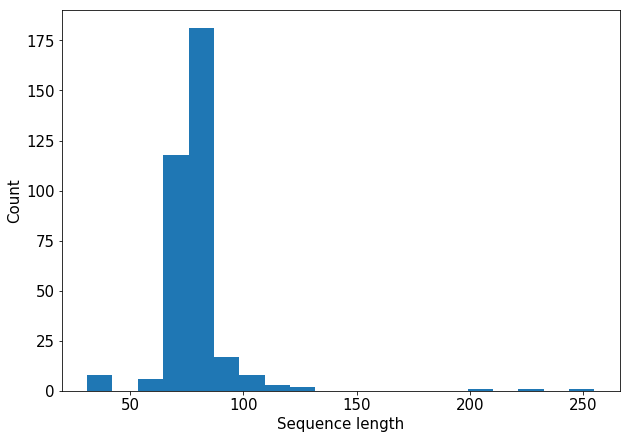

In [46]:
plt.tick_params(
    axis='y')
plt.tick_params(
    axis='x')
plt.hist(sizes, bins=20)
plt.xlabel("Sequence length", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=15)
#plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [4]:
sizes = [len(rec.seq) for rec in SeqIO.parse("extra_second_negative_bacteriocin_proper_distribution", "fasta")]
print (len(sizes), min(sizes), max(sizes))

346 30 255


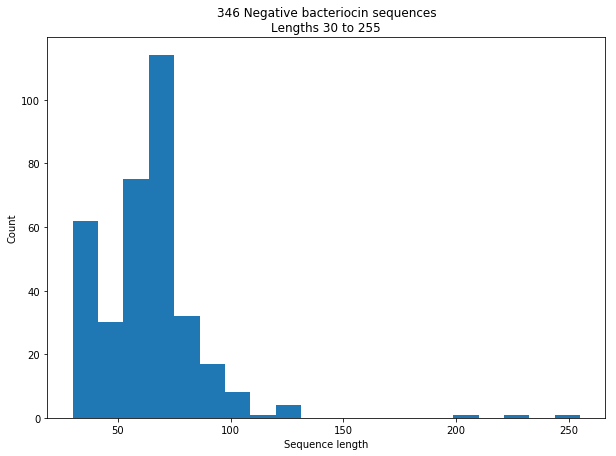

In [5]:
plt.hist(sizes, bins=20)
plt.title("%i Negative bacteriocin sequences\nLengths %i to %i" \
            % (len(sizes),min(sizes),max(sizes)))
plt.xlabel("Sequence length")
plt.ylabel("Count")

plt.show()

999 6 94


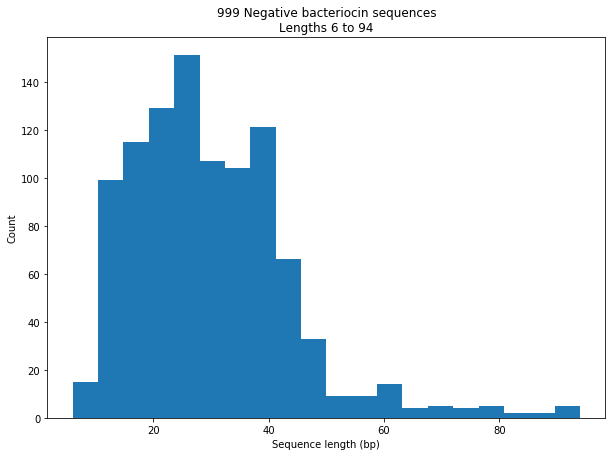

In [31]:
sizes = [len(rec.seq) for rec in SeqIO.parse("neg_antibp2.fa", "fasta")]
print len(sizes), min(sizes), max(sizes)

plt.hist(sizes, bins=20)
plt.title("%i Negative bacteriocin sequences\nLengths %i to %i" \
            % (len(sizes),min(sizes),max(sizes)))
plt.xlabel("Sequence length (bp)")
plt.ylabel("Count")

plt.show()

## Sorting the lactobacillus predictions by probability

In [51]:
sort_dict = defaultdict(int)
for index, record in enumerate(SeqIO.parse('temp_word_svm_wild_predictions_lacto_10_fold_0.5', 'fasta')):
    tok = record.description.split("|")[5]
    sort_dict[index] = float(tok)
    
sorted_tuples = sorted(sort_dict.items(), key=lambda x: x[1], reverse=True)
print sorted_tuples

[(45, 0.996104), (149, 0.996104), (205, 0.996104), (390, 0.992508), (593, 0.992508), (196, 0.992391), (204, 0.987246), (731, 0.98673), (44, 0.986213), (148, 0.986213), (1020, 0.986009), (282, 0.985981), (391, 0.985688), (594, 0.985688), (0, 0.982623), (300, 0.981296), (295, 0.979841), (1073, 0.979828), (999, 0.978992), (301, 0.974289), (147, 0.972984), (998, 0.969496), (577, 0.968048), (299, 0.964389), (197, 0.962155), (785, 0.960386), (298, 0.95765), (376, 0.957004), (114, 0.953565), (524, 0.953565), (865, 0.953565), (1107, 0.953565), (1134, 0.953565), (447, 0.952901), (373, 0.952176), (578, 0.952176), (371, 0.9514), (161, 0.950846), (930, 0.949472), (1047, 0.949472), (217, 0.949204), (559, 0.948521), (818, 0.948521), (1145, 0.948521), (929, 0.948364), (1046, 0.948364), (264, 0.947345), (1148, 0.945282), (362, 0.941198), (158, 0.940169), (21, 0.939625), (743, 0.939625), (1088, 0.939625), (140, 0.938314), (896, 0.938314), (17, 0.937548), (739, 0.937548), (46, 0.936422), (198, 0.93502),

In [52]:
out_handle = open('temp_word_svm_wild_predictions_lacto_10_fold_0.5_sorted', 'w')
for index, proba_ in sorted_tuples:
    for index1, record in enumerate(SeqIO.parse('temp_word_svm_wild_predictions_lacto_10_fold_0.5', 'fasta')):
        if index == index1:
            out_handle.write('>%s\n%s\n' % (record.description, record.seq))
            break
            
out_handle.close()

In [1]:
print 'hello'

hello
